In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm


--2021-04-16 05:01:50--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-04-16 05:01:50--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2021-04-16 05:01:50 (4.11 MB/s) - ‘t

In [ ]:
from google.colab import files

uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['Customer Behaviors (Responses)_original.xlsx']))

Saving Customer Behaviors (Responses)_original.xlsx to Customer Behaviors (Responses)_original.xlsx


In [ ]:

df_itab = df.copy()
df_itab = df_itab.drop(['Timestamp'], axis = 1)
df_itab.columns = df_itab.columns.str.replace("คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด","สนใจ")
df_itab.columns = df_itab.columns.str.replace("คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน","บ่อย") 
#df_itab = df_itab.replace(["ชาย","หญิง","ไม่ต้องการระบุ"],[1,0,-1]) 
df_itab

,สนใจ [อาหารญี่ปุ่น],สนใจ [อาหารจึน],สนใจ [อาหารไทย],สนใจ [อาหารอีสาน],สนใจ [อาหารสุขภาพ],สนใจ [บุฟเฟต์],สนใจ [ชาบูชาบู],สนใจ [ปิ้งย่าง],สนใจ [เหล้าเบียร์],สนใจ [เสื้อผ้าแฟชั่น],สนใจ [แต่งหน้า],สนใจ [skincare บำรุงผิว],สนใจ [การออกกำลังกาย],สนใจ [การเล่นเกมส์],สนใจ [การท่องเที่ยว],สนใจ [การอ่านหนังสือ],สนใจ [การอ่านบทความ Online],สนใจ [การเรียน e-learning],สนใจ [ดู Series],สนใจ [ดูหนัง],สนใจ [ดู Youtube],สนใจ [ดู Netflix],สนใจ [Content ด้านบันเทิง],สนใจ [Content เกี่่ยวกับเกมส์],สนใจ [Content เกี่ยวกับการ review ร้านอาหาร],สนใจ [Content เกี่ยวกับการท่องเที่ยว],สนใจ [Content เกี่ยวกับการแต่งบ้าน],สนใจ [Content เกี่ยวกับการโทรทัศน์],สนใจ [Content เกี่ยวกับละคร],สนใจ [Content เกี่ยวกับการเมือง],บ่อย [อาหารญี่ปุ่น],บ่อย [อาหารจึน],บ่อย [อาหารไทย],บ่อย [อาหารอีสาน],บ่อย [อาหารสุขภาพ],บ่อย [บุฟเฟต์],บ่อย [ชาบูชาบู],บ่อย [ปิ้งย่าง],บ่อย [เหล้าเบียร์],บ่อย [เสื้อผ้าแฟชั่น],บ่อย [แต่งหน้า],บ่อย [skincare บำรุงผิว],บ่อย [การออกกำลังกาย],บ่อย [การเล่นเกมส์],บ่อย [การท่องเที่ยว],บ่อย [การอ่านหนังสือ],บ่อย [การอ่านบทความ Online],บ่อย [การเรียน e-learning],บ่อย [ดู Series],บ่อย [ดูหนัง],บ่อย [ดู Youtube],บ่อย [ดู Netflix],บ่อย [Content ด้านบันเทิง],บ่อย [Content เกี่่ยวกับเกมส์],บ่อย [Content เกี่ยวกับการ review ร้านอาหาร],บ่อย [Content เกี่ยวกับการท่องเที่ยว],บ่อย [Content เกี่ยวกับการแต่งบ้าน],บ่อย [Content เกี่ยวกับการโทรทัศน์],บ่อย [Content เกี่ยวกับละคร],บ่อย [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19 00:00:00,ชาย
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,กีฬา สัตว์เลี้ยง เทคโนโลยี,2536-08-10 00:00:00,หญิง
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,-,

In [ ]:
index_gen = df_itab[df_itab['เพศ'] == 'ไม่ต้องการระบุ'].index
df_itab.drop(index_gen, inplace=True)
df_itab

,สนใจ [อาหารญี่ปุ่น],สนใจ [อาหารจึน],สนใจ [อาหารไทย],สนใจ [อาหารอีสาน],สนใจ [อาหารสุขภาพ],สนใจ [บุฟเฟต์],สนใจ [ชาบูชาบู],สนใจ [ปิ้งย่าง],สนใจ [เหล้าเบียร์],สนใจ [เสื้อผ้าแฟชั่น],สนใจ [แต่งหน้า],สนใจ [skincare บำรุงผิว],สนใจ [การออกกำลังกาย],สนใจ [การเล่นเกมส์],สนใจ [การท่องเที่ยว],สนใจ [การอ่านหนังสือ],สนใจ [การอ่านบทความ Online],สนใจ [การเรียน e-learning],สนใจ [ดู Series],สนใจ [ดูหนัง],สนใจ [ดู Youtube],สนใจ [ดู Netflix],สนใจ [Content ด้านบันเทิง],สนใจ [Content เกี่่ยวกับเกมส์],สนใจ [Content เกี่ยวกับการ review ร้านอาหาร],สนใจ [Content เกี่ยวกับการท่องเที่ยว],สนใจ [Content เกี่ยวกับการแต่งบ้าน],สนใจ [Content เกี่ยวกับการโทรทัศน์],สนใจ [Content เกี่ยวกับละคร],สนใจ [Content เกี่ยวกับการเมือง],บ่อย [อาหารญี่ปุ่น],บ่อย [อาหารจึน],บ่อย [อาหารไทย],บ่อย [อาหารอีสาน],บ่อย [อาหารสุขภาพ],บ่อย [บุฟเฟต์],บ่อย [ชาบูชาบู],บ่อย [ปิ้งย่าง],บ่อย [เหล้าเบียร์],บ่อย [เสื้อผ้าแฟชั่น],บ่อย [แต่งหน้า],บ่อย [skincare บำรุงผิว],บ่อย [การออกกำลังกาย],บ่อย [การเล่นเกมส์],บ่อย [การท่องเที่ยว],บ่อย [การอ่านหนังสือ],บ่อย [การอ่านบทความ Online],บ่อย [การเรียน e-learning],บ่อย [ดู Series],บ่อย [ดูหนัง],บ่อย [ดู Youtube],บ่อย [ดู Netflix],บ่อย [Content ด้านบันเทิง],บ่อย [Content เกี่่ยวกับเกมส์],บ่อย [Content เกี่ยวกับการ review ร้านอาหาร],บ่อย [Content เกี่ยวกับการท่องเที่ยว],บ่อย [Content เกี่ยวกับการแต่งบ้าน],บ่อย [Content เกี่ยวกับการโทรทัศน์],บ่อย [Content เกี่ยวกับละคร],บ่อย [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19 00:00:00,ชาย
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,กีฬา สัตว์เลี้ยง เทคโนโลยี,2536-08-10 00:00:00,หญิง
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,-,

In [ ]:
df_itab = df_itab.replace(["ไม่สนใจอย่างมากที่สุด","ไม่สนใจอย่างมาก","ไม่สนใจ","เฉยๆ","สนใจ","สนใจอย่างมาก","สนใจอย่างมากที่สุด"], [0,1,2,3,4,5,6])
df_itab = df_itab.replace(["แทบไม่ได้บริโภคเลย","หลายเดือนครั้ง","เดือนละ 2-3 ครั้ง","เดือนละครั้ง","อาทิตย์ละครั้ง","แทบทุกวัน"], [0,1,2,3,4,5])

#writer = ExcelWriter(r'Customer_Behavior_export.xlsx')
#df_itab.to_excel(writer)
#writer.save()

df_interest = df_itab.copy()
df_freq = df_itab.copy()

df_interest = df_interest.drop(['นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง', 'คุณเกิดวันที่เท่าไหร่'], axis = 1)
df_interest = df_interest.drop(list(df_interest.filter(regex='บ่อย')), axis = 1)

df_interest

,สนใจ [อาหารญี่ปุ่น],สนใจ [อาหารจึน],สนใจ [อาหารไทย],สนใจ [อาหารอีสาน],สนใจ [อาหารสุขภาพ],สนใจ [บุฟเฟต์],สนใจ [ชาบูชาบู],สนใจ [ปิ้งย่าง],สนใจ [เหล้าเบียร์],สนใจ [เสื้อผ้าแฟชั่น],สนใจ [แต่งหน้า],สนใจ [skincare บำรุงผิว],สนใจ [การออกกำลังกาย],สนใจ [การเล่นเกมส์],สนใจ [การท่องเที่ยว],สนใจ [การอ่านหนังสือ],สนใจ [การอ่านบทความ Online],สนใจ [การเรียน e-learning],สนใจ [ดู Series],สนใจ [ดูหนัง],สนใจ [ดู Youtube],สนใจ [ดู Netflix],สนใจ [Content ด้านบันเทิง],สนใจ [Content เกี่่ยวกับเกมส์],สนใจ [Content เกี่ยวกับการ review ร้านอาหาร],สนใจ [Content เกี่ยวกับการท่องเที่ยว],สนใจ [Content เกี่ยวกับการแต่งบ้าน],สนใจ [Content เกี่ยวกับการโทรทัศน์],สนใจ [Content เกี่ยวกับละคร],สนใจ [Content เกี่ยวกับการเมือง],เพศ
0,4,4,6,5,4,4,4,4,6,3,2,4,5,5,3,4,4,6,5,5,4,6,4,5,5,3,3,3,3,6,ชาย
1,5,3,6,5,4,5,6,5,2,3,3,3,5,5,6,6,6,6,3,6,6,5,3,3,5,6,6,3,2,4,หญิง
2,6,3,5,4,3,6,6,6,1,3,0,1,4,6,6,6,6,3,6,6,6,6,6,6,6,6,6,5,2,6,ชาย
3,4,3,3,3,4,4,4,4,0,0,0,6,5,6,6,4,4,5,6,6,6,6,0,6,3,4,3,2,0,5,ชาย
4,5,4,4,4,6,3,3,3,3,3,4,5,6,2,4,5,4,4,6,6,3,6,3,2,3,4,4,2,2,3,หญิง
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,3,5,3,3,4,3,3,4,4,4,4,5,4,2,4,4,4,4,4,3,3,3,2,1,2,2,2,2,1,2,หญิง
58,4,6,6,6,6,3,3,3,3,4,3,4,6,2,4,5,5,6,6,6,5,4,6,2,3,3,3,5,6,3,หญิง
59,5,4,5,4,6,5,6,5,3,4,1,4,6,6,6,4,5,5,6,6,6,6,6,4,4,6,1,3,4,5,ชาย
60,4,3,5,5,4,1,3,4,2,5,5,5,4,4,6,3,4,4,5,4,5,5,3,4,4,5,4,3,3,3,หญิง


In [ ]:
df_gen = df_interest.groupby(['เพศ']).sum() / df_interest.groupby('เพศ').count()
df_gen

#writer = ExcelWriter(r'Customer_Behavior_IntGender.xlsx')
#df_gen.to_excel(writer)
#writer.save()

,สนใจ [อาหารญี่ปุ่น],สนใจ [อาหารจึน],สนใจ [อาหารไทย],สนใจ [อาหารอีสาน],สนใจ [อาหารสุขภาพ],สนใจ [บุฟเฟต์],สนใจ [ชาบูชาบู],สนใจ [ปิ้งย่าง],สนใจ [เหล้าเบียร์],สนใจ [เสื้อผ้าแฟชั่น],สนใจ [แต่งหน้า],สนใจ [skincare บำรุงผิว],สนใจ [การออกกำลังกาย],สนใจ [การเล่นเกมส์],สนใจ [การท่องเที่ยว],สนใจ [การอ่านหนังสือ],สนใจ [การอ่านบทความ Online],สนใจ [การเรียน e-learning],สนใจ [ดู Series],สนใจ [ดูหนัง],สนใจ [ดู Youtube],สนใจ [ดู Netflix],สนใจ [Content ด้านบันเทิง],สนใจ [Content เกี่่ยวกับเกมส์],สนใจ [Content เกี่ยวกับการ review ร้านอาหาร],สนใจ [Content เกี่ยวกับการท่องเที่ยว],สนใจ [Content เกี่ยวกับการแต่งบ้าน],สนใจ [Content เกี่ยวกับการโทรทัศน์],สนใจ [Content เกี่ยวกับละคร],สนใจ [Content เกี่ยวกับการเมือง]
เพศ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ชาย,5.147059,3.647059,4.647059,4.117647,3.941176,4.470588,4.764706,4.794118,3.588235,3.176471,1.294118,2.941176,4.352941,4.823529,5.000000,4.176471,4.382353,4.470588,4.529412,4.705882,4.764706,4.764706,3.264706,3.941176,3.852941,4.294118,3.558824,2.441176,1.970588,4.352941
หญิง,5.035714,3.821429,4.678571,4.250000,4.000000,4.392857,4.642857,4.428571,2.571429,4.214286,4.178571,4.642857,4.071429,3.285714,5.071429,4.142857,4.357143,4.250000,4.678571,4.750000,4.428571,4.642857,4.392857,2.750000,4.357143,4.714286,4.107143,3.035714,3.107143,2.892857


In [ ]:
df_sum_interest = df_interest.drop(['เพศ'], axis=1)
sum_interest = df_sum_interest.sum()
print(sum_interest.sort_values(ascending=False).head)


สนใจ [อาหารญี่ปุ่น]                      316
สนใจ [การท่องเที่ยว]                     312
สนใจ [ดูหนัง]                            293
สนใจ [ชาบูชาบู]                          292
สนใจ [ดู Netflix]                        292
สนใจ [อาหารไทย]                          289
สนใจ [ปิ้งย่าง]                          287
สนใจ [ดู Youtube]                        286
สนใจ [ดู Series]                         285
สนใจ [Content เกี่ยวกับการท่องเที่ยว]    278
dtype: int64


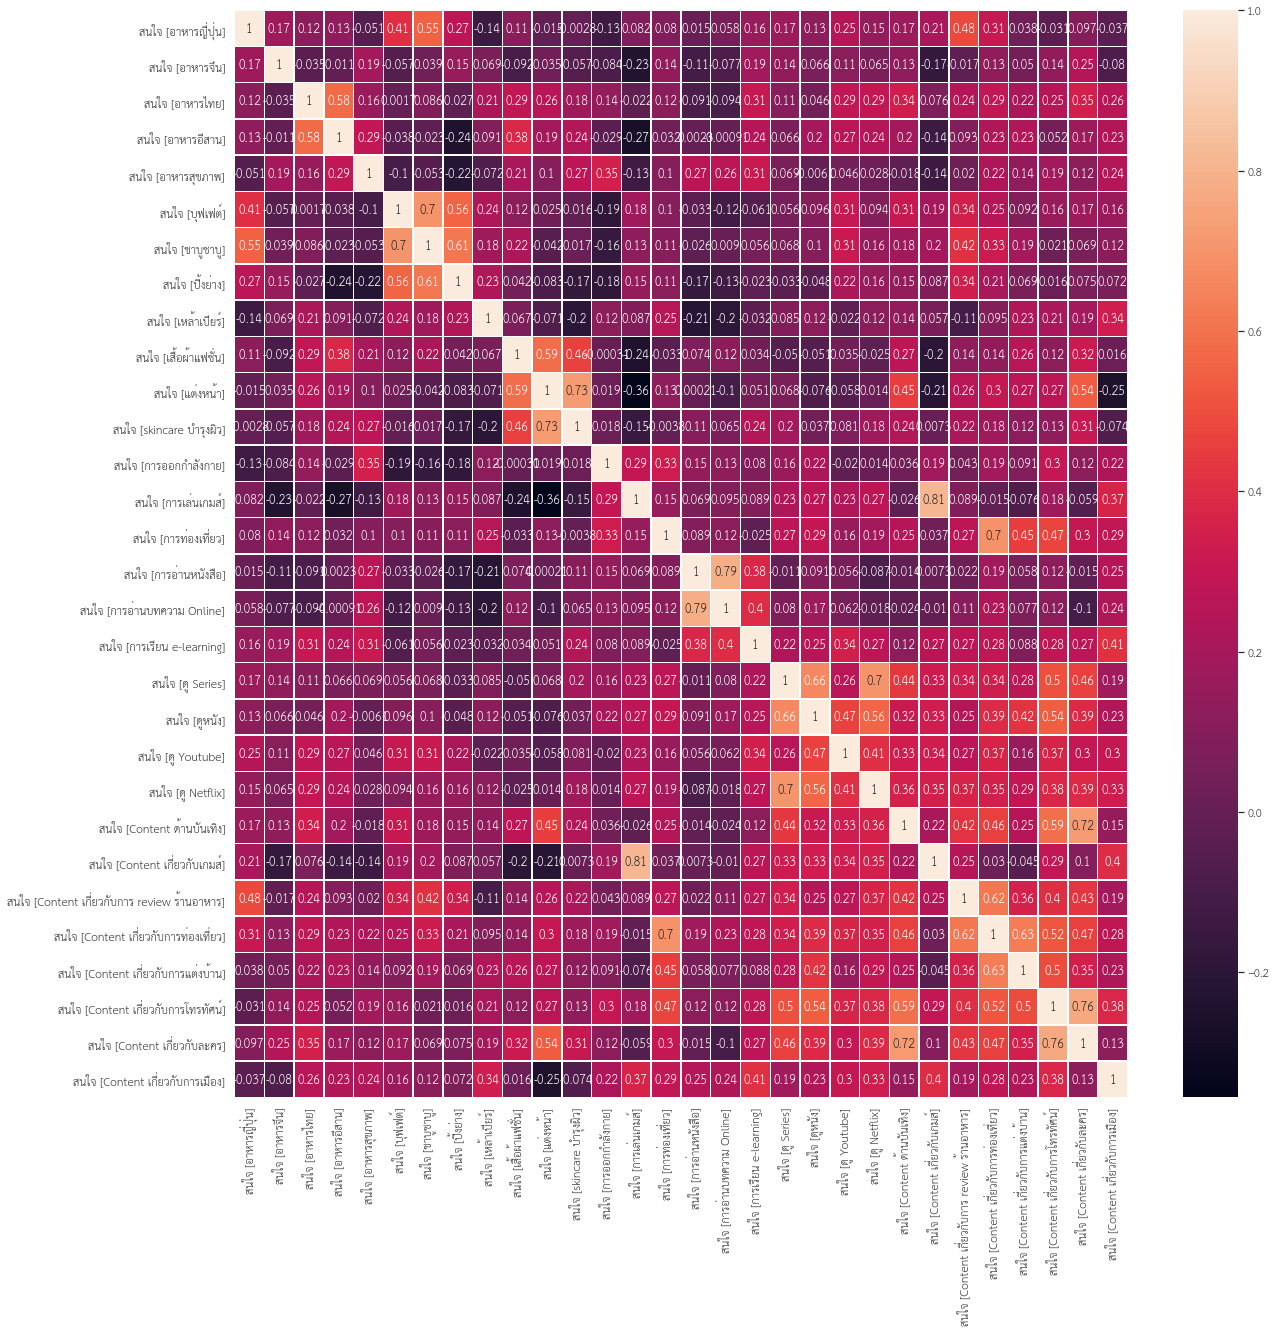

In [ ]:
from __future__ import unicode_literals
sns.set(font='TH Sarabun New')
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_interest.corr(), annot=True, linewidths=.5, ax=ax)


In [ ]:
#df_freq = df_freq.drop(['คุณเกิดวันที่เท่าไหร่'], axis = 1)
df_freq = df_freq.drop(list(df_freq.filter(regex='สนใจ')), axis = 1)
df_freq_gen = df_freq.groupby(['เพศ']).sum() / df_freq.groupby('เพศ').count()


writer = ExcelWriter(r'Customer_Behavior_freqGender.xlsx')
df_freq_gen.to_excel(writer)
writer.save()

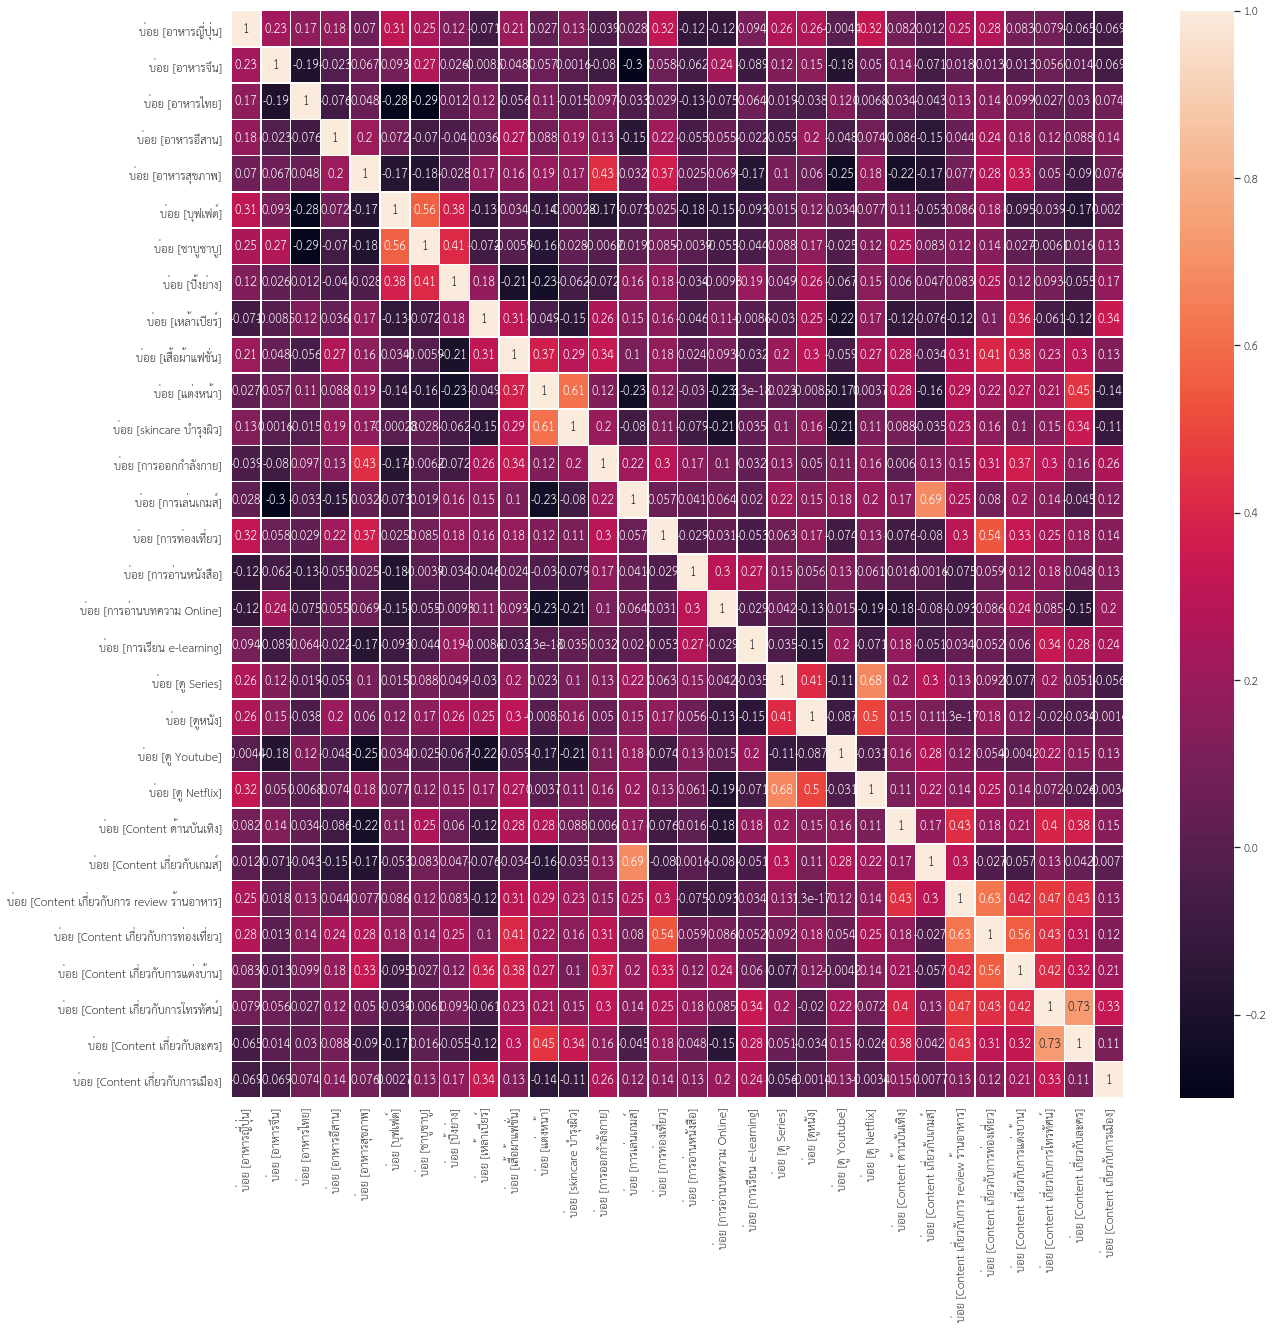

In [ ]:
from __future__ import unicode_literals
sns.set(font='TH Sarabun New')
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_freq.corr(), annot=True, linewidths=.5, ax=ax)

In [ ]:
from datetime import datetime

for row in range(len(df_itab)):

  print(df_itab.loc[row, "คุณเกิดวันที่เท่าไหร่"].year)
  year_str = str(df_itab.loc[row, "คุณเกิดวันที่เท่าไหร่"].year)

  if year_str[:2] == '25':
    print("if loop")
    year_ad = int(year_str) - 543
    year_ads = str(year_ad)
    print(type(year_ads),year_ads)
    col = df_itab[col(['คุณเกิดวันที่เท่าไหร่'])
    df_itab.loc[row, "คุณเกิดวันที่เท่าไหร่"].year.replace(year_str, year_ads)
    #df_itab.loc[row, col].year.replace(year_str, year_ads)

  row = row + 1
